In [81]:
# import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [82]:
data = pd.read_csv('C:/Users/HP/Desktop/revision/projects/Loan_Default.csv')

In [83]:
data.head(3)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0


In [84]:
#shape of dataset

data.shape

(148670, 34)

In [85]:
#find null values

data.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [86]:
#we can see many columns with null values
#fill null values with median of data

from sklearn.impute import SimpleImputer
s_imputer = SimpleImputer(strategy='median')

roi = s_imputer.fit_transform(data[['rate_of_interest']])

irs = s_imputer.fit_transform(data[['Interest_rate_spread']])

ufc = s_imputer.fit_transform(data[['Upfront_charges']])

t = s_imputer.fit_transform(data[['term']])

pv = s_imputer.fit_transform(data[['property_value']])

i = s_imputer.fit_transform(data[['income']])

ltv = s_imputer.fit_transform(data[['LTV']])


In [87]:
data['Rate_of _Interest'] = roi
data['interest_rate_speed'] = irs
data['upfront_charges'] = ufc
data['Term'] = t
data['Property_value'] = pv
data['Income'] = i
data['ltv'] = ltv

In [88]:
d_data = data.drop(columns=(['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'LTV', 'ID', 'year', 'Term']), axis=1)

In [89]:
ld_data = d_data.drop(columns=(['dtir1']),axis=1)

In [90]:
ld_data.isna().sum()

loan_limit                   3344
Gender                          0
approv_in_adv                 908
loan_type                       0
loan_purpose                  134
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
Neg_ammortization             121
interest_only                   0
lump_sum_payment                0
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                           200
submission_of_application     200
Region                          0
Security_Type                   0
Status                          0
Rate_of _Interest               0
interest_rate_speed             0
upfront_charges                 0
Property_value                  0
Income                          0
ltv           

In [91]:
ld_data.shape

(148670, 30)

In [92]:
#EDA

ld_data['Status'].value_counts()

0    112031
1     36639
Name: Status, dtype: int64

<AxesSubplot:xlabel='Status', ylabel='count'>

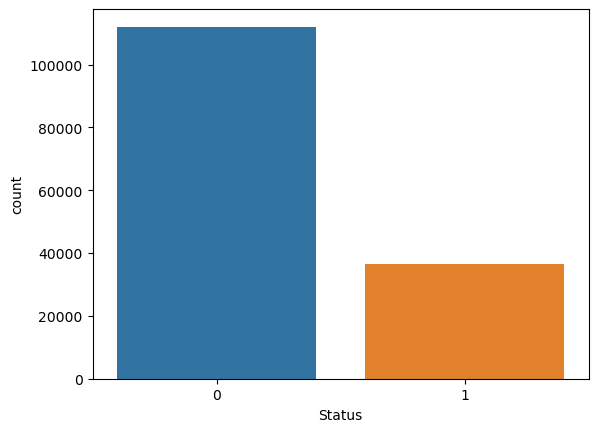

In [93]:
sns.countplot(ld_data['Status'])

<Figure size 1000x1000 with 0 Axes>

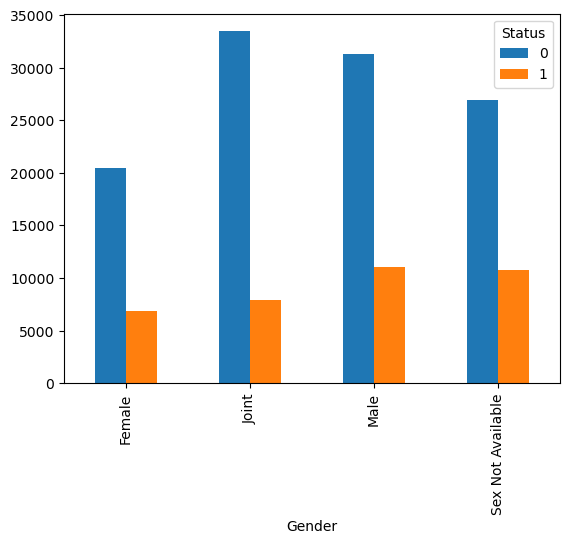

In [94]:
plt.figure(figsize=(10,10))
crosstb = pd.crosstab(ld_data['Gender'], ld_data['Status'])
barplot = crosstb.plot.bar()

<Figure size 1000x1000 with 0 Axes>

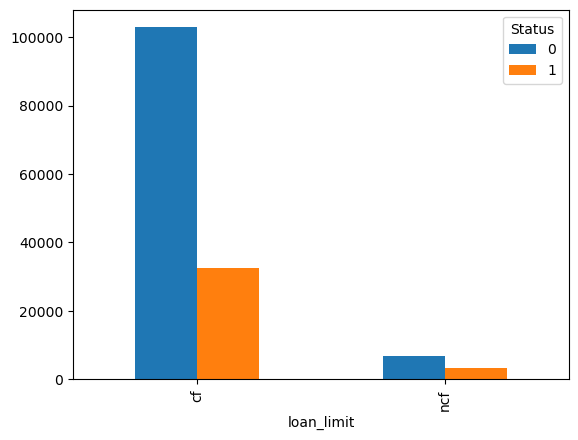

In [95]:
plt.figure(figsize=(10,10))
crosstb = pd.crosstab(ld_data['loan_limit'], ld_data['Status'])
barplot = crosstb.plot.bar()

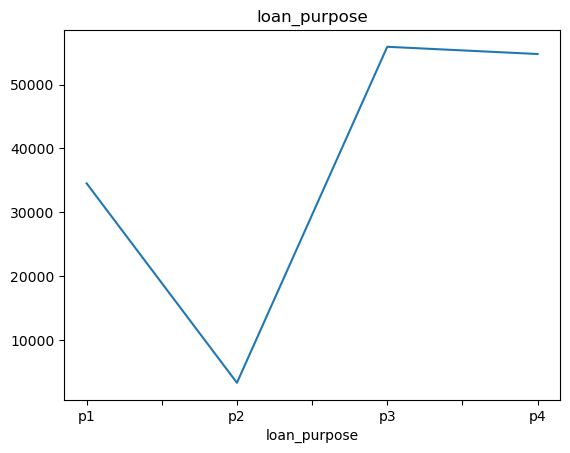

In [96]:
ld_data.groupby('loan_purpose')['loan_purpose'].count().plot()
plt.title('loan_purpose')
plt.show()

<Figure size 1000x1000 with 0 Axes>

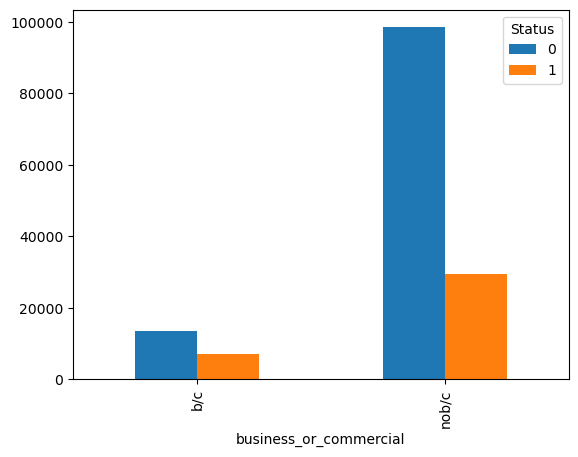

In [97]:
plt.figure(figsize=(10,10))
crosstb = pd.crosstab(ld_data['business_or_commercial'], ld_data['Status'])
barplot = crosstb.plot.bar()

In [98]:
ld_data.corr()

,loan_amount,Credit_Score,Status,Rate_of _Interest,interest_rate_speed,upfront_charges,Property_value,Income,ltv
loan_amount,1.000000,0.004438,-0.036825,-0.122830,-0.309280,0.057451,0.686242,0.440715,0.036361
Credit_Score,0.004438,1.000000,0.004004,-0.001341,-0.001703,-0.001691,0.002165,0.000902,-0.005208
Status,-0.036825,0.004004,1.000000,-0.046738,-0.049536,-0.095094,-0.080905,-0.060618,0.042656
Rate_of _Interest,-0.122830,-0.001341,-0.046738,1.000000,0.615149,-0.071066,-0.102772,-0.014341,-0.002258
interest_rate_speed,-0.309280,-0.001703,-0.049536,0.615149,1.000000,0.035799,-0.286711,-0.099612,0.036361
upfront_charges,0.057451,-0.001691,-0.095094,-0.071066,0.035799,1.000000,0.050689,0.027104,-0.032499
Property_value,0.686242,0.002165,-0.080905,-0.102772,-0.286711,0.050689,1.000000,0.389435,-0.215871
Income,0.440715,0.000902,-0.060618,-0.014341,-0.099612,0.027104,0.389435,1.000000,-0.034317
ltv,0.036361,-0.005208,0.042656,-0.002258,0.036361,-0.032499,-0.215871,-0.034317,1.000000


<AxesSubplot:>

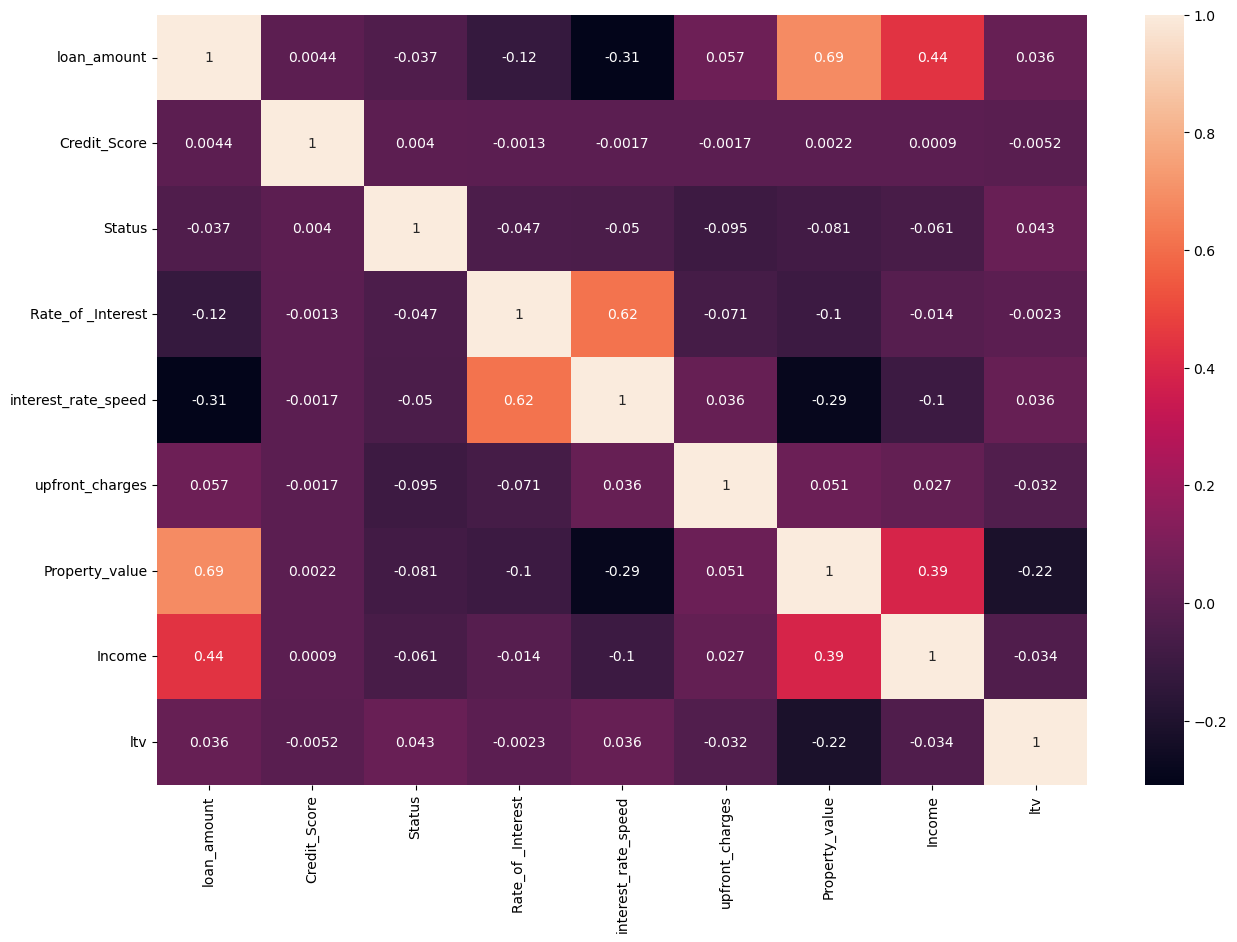

In [99]:
plt.figure(figsize=(15,10))
sns.heatmap(ld_data.corr(), annot=True)

# Observations

1. we can see there is imbalance in data
2. through loan limit we understand most of the loan_limit where 'cf'
3. Through loan_purpose graph ive understood most of the loan_purpose is p3
4. Through correlation we understood that there is less relation between status and ID, year, term

In [100]:
loan_data = ld_data.dropna()
loan_data.shape

(143983, 30)

In [101]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143983 entries, 0 to 148669
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 143983 non-null  object 
 1   Gender                     143983 non-null  object 
 2   approv_in_adv              143983 non-null  object 
 3   loan_type                  143983 non-null  object 
 4   loan_purpose               143983 non-null  object 
 5   Credit_Worthiness          143983 non-null  object 
 6   open_credit                143983 non-null  object 
 7   business_or_commercial     143983 non-null  object 
 8   loan_amount                143983 non-null  int64  
 9   Neg_ammortization          143983 non-null  object 
 10  interest_only              143983 non-null  object 
 11  lump_sum_payment           143983 non-null  object 
 12  construction_type          143983 non-null  object 
 13  occupancy_type             14

In [102]:
#considering only numeric data for independent variables

x = loan_data[['loan_amount', 'Credit_Score', 'Rate_of _Interest', 'interest_rate_speed', 'upfront_charges', 'Property_value', 'Income', 'ltv']].values
y = loan_data['Status'].values

In [103]:
#split data into train_test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0 )

In [104]:
#using hyper_parameter_tuning for Logistic regression model

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
l_model = LogisticRegression()
l_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [105]:

params = {'C': [0.001, 0.01, 0.1, 1,1.2,2], 'max_iter' : [100,150,250,500,1000], 'penalty': ['l1', 'l2', 'elasticnet'],'random_state': [0]}

gscv = GridSearchCV(l_model,param_grid=params, scoring='accuracy')

gscv.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1.2, 2],
                         'max_iter': [100, 150, 250, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [0]},
             scoring='accuracy')

In [106]:
gscv.best_score_

0.7554737564725581

In [107]:
gscv.best_params_

{'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'random_state': 0}

In [108]:
gscv.best_estimator_

LogisticRegression(C=0.001, random_state=0)

In [109]:
#Even though score is OK but, as we seen in graph that data is imbalanced we will balance the data by using following methods

#1.under sampling process

from imblearn.under_sampling import RandomUnderSampler
ram = RandomUnderSampler()

x = loan_data[['loan_amount', 'Credit_Score', 'Rate_of _Interest', 'interest_rate_speed', 'upfront_charges', 'Property_value', 'Income', 'ltv']].values
y = loan_data['Status'].values

x_ram,y_ram = ram.fit_resample(x,y)

In [110]:
from collections import Counter

print('Before under sampling shape is :', Counter(y))
print('After under sampling shape is :', Counter(y_ram))

Before under sampling shape is : Counter({0: 108713, 1: 35270})
After under sampling shape is : Counter({0: 35270, 1: 35270})


In [111]:
#split data into train_test

from sklearn.model_selection import train_test_split

x_train_u, x_test_u, y_train_u, y_test_u = train_test_split(x_ram, y_ram, test_size= 0.2, random_state=0 )

In [132]:
#train the model

from sklearn.tree import DecisionTreeClassifier

d_model = DecisionTreeClassifier()

d_model.fit(x_train_u,y_train_u)

#evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_u = d_model.predict(x_test_u)

score = accuracy_score(y_test_u,y_pred_u)
print('Accuracy_score is:',score)



Accuracy_score is: 1.0


In [133]:
#use confusion_matrix and classification_report for detail evaluation

from sklearn.metrics import confusion_matrix, classification_report
cm_u = confusion_matrix(y_test_u,y_pred_u)
cm_u

array([[6942,    0],
       [   0, 7166]], dtype=int64)

<AxesSubplot:>

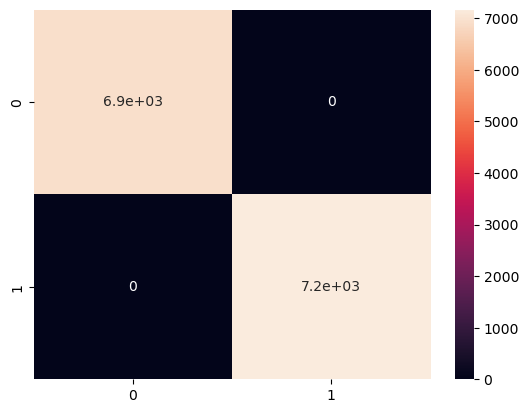

In [136]:
sns.heatmap(cm_u, annot=True)

In [135]:
cls_rpt_u = classification_report(y_test_u, y_pred_u)

print(cls_rpt_u)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6942
           1       1.00      1.00      1.00      7166

    accuracy                           1.00     14108
   macro avg       1.00      1.00      1.00     14108
weighted avg       1.00      1.00      1.00     14108



In [113]:
#2.Over Sampling

from imblearn.over_sampling import SMOTE

smt = SMOTE()
x_smt, y_smt = smt.fit_resample(x,y)

In [114]:
from collections import Counter

print('Before under sampling shape is :', Counter(y))
print('After under sampling shape is :', Counter(y_smt))

Before under sampling shape is : Counter({0: 108713, 1: 35270})
After under sampling shape is : Counter({1: 108713, 0: 108713})


In [115]:
#split data into train_test

from sklearn.model_selection import train_test_split

x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_smt, y_smt, test_size= 0.2, random_state=0 )

In [119]:
#train the model

from sklearn.tree import DecisionTreeClassifier

d_model = DecisionTreeClassifier()

d_model.fit(x_train_s,y_train_s)

#evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_s = d_model.predict(x_test_s)

score = accuracy_score(y_test_s, y_pred_s)
score


0.9999770040932714

In [125]:
#use confusion_matrix and classification_report for detail evaluation

from sklearn.metrics import confusion_matrix, classification_report
cm_s = confusion_matrix(y_test_s,y_pred_s)
cm_s

array([[21683,     1],
       [    0, 21802]], dtype=int64)

<AxesSubplot:>

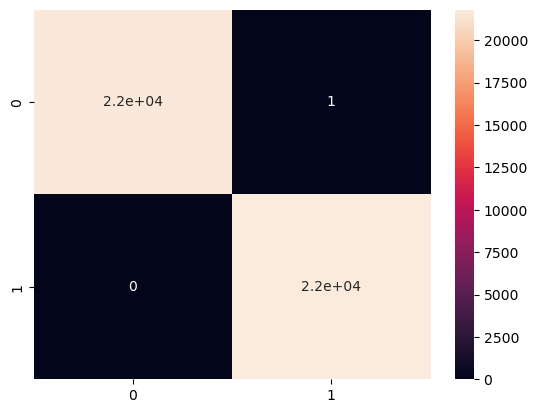

In [129]:
sns.heatmap(cm_s, annot=True)

In [127]:
cls_rpt_s = classification_report(y_test_s, y_pred_s)

print(cls_rpt_s)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21684
           1       1.00      1.00      1.00     21802

    accuracy                           1.00     43486
   macro avg       1.00      1.00      1.00     43486
weighted avg       1.00      1.00      1.00     43486



# Obseravtions

1. from above models we got the best score after  under_sampling the DecisionTreeClassifier model i.e; 1 which is perfect model to predict 